Final Centroids (Cluster Centers):
[[ 5.14285714  6.        ]
 [15.         15.        ]]

Cluster Assignments:
Point A: Cluster 1
Point B: Cluster 1
Point C: Cluster 1
Point D: Cluster 1
Point E: Cluster 1
Point F: Cluster 1
Point G: Cluster 2
Point H: Cluster 1


C:\Users\CVR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


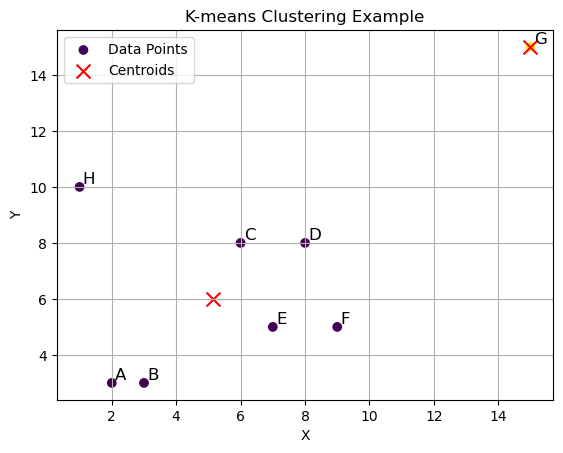

In [2]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
 
# Define the data points (A, B, C, D, E, F)

data = np.array([

    [2, 3],  # Point A

    [3, 3],  # Point B

    [6, 8],  # Point C

    [8, 8],  # Point D

    [7, 5],  # Point E

    [9, 5],   # Point F
    
    [15, 15],  # Outlier 1
    
    [1, 10],   # Outlier 2

])
 
# Perform K-means clustering with K=2

kmeans = KMeans(n_clusters=2, random_state=0).fit(data)
 
# Get the cluster centers (centroids) and labels

centroids = kmeans.cluster_centers_

labels = kmeans.labels_
 
# Print the final centroids and cluster assignments

print("Final Centroids (Cluster Centers):")

print(centroids)
 
print("\nCluster Assignments:")

for i, label in enumerate(labels):

    print(f"Point {chr(65+i)}: Cluster {label+1}")
 
# Plot the data points and the centroids

plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', marker='o', label='Data Points')

plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
 
# Annotate points

for i, point in enumerate(data):

    plt.text(point[0]+0.1, point[1]+0.1, f'{chr(65+i)}', fontsize=12)
 
plt.title('K-means Clustering Example')

plt.xlabel('X')

plt.ylabel('Y')

plt.legend()

plt.grid(True)

plt.show()

 

          X         Y      Label
0  1.248357  1.760413  Cluster 1
1  0.930868  1.907171  Cluster 1
2  1.323844  1.446833  Cluster 1
3  1.761515  1.401897  Cluster 1
4  0.882923  2.406263  Cluster 1


C:\Users\CVR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\CVR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\CVR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\CVR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with M

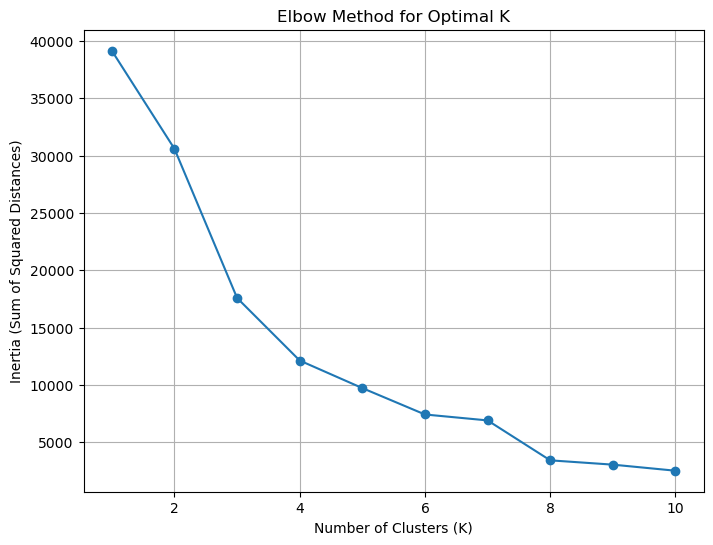

C:\Users\CVR\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


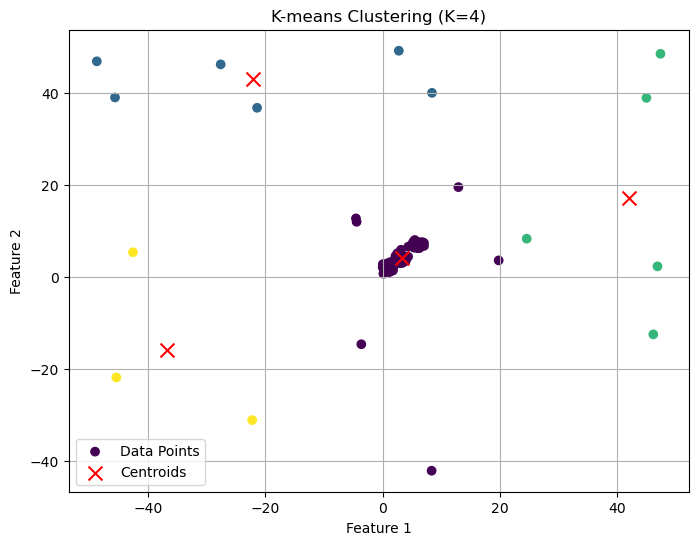

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import pandas as pd

# Step 1: Load the dataset
path = 'C:/Users/CVR/Desktop/22B81A12C2_COE/22-03-2025/kmeans_dataset_with_outliers.csv'
df = pd.read_csv(path)

# Step 2: Check the first few rows of the dataset to understand its structure
print(df.head())

# Assuming the dataset consists of numerical features for clustering
# If needed, we select specific columns for clustering (e.g., "Feature1" and "Feature2")
# For this example, I am assuming the dataframe has only the relevant columns for clustering
X = df.select_dtypes(include=[np.number]).values  # Select only numeric columns for clustering

# Step 3: Elbow Method to find the optimal number of clusters
inertia = []  # List to hold the inertia values for each k
k_range = range(1, 11)  # Test K values from 1 to 10

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)  # Store the inertia (sum of squared distances to centroids)

# Step 4: Plot the Elbow graph
plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Sum of Squared Distances)')
plt.grid(True)
plt.show()

# Step 5: Choose the optimal k from the Elbow graph (let's assume it is k=4 for this example)
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Step 6: Plot the final K-means clusters
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', marker='o', label='Data Points')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.title(f'K-means Clustering (K={optimal_k})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()
